## Introduction

### Objectives and Data

The objective of this project is to predict house prices given different features describing the house. I will be using real estate market data from the USA for the sake of this project. The data is collected from Kaggle. A link to the dataset could be found below. I hope to predict where property prices are moving towards. I will use historic data and hope to be able to predict the prices of real estate listing in the future in this market. Property prices are a good indicator of both the overall market condition and the economic health of a country. I will be wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues. I will use several different machine learning regression techniques in this project. I will use linear regression, lasso regression, random forest, and xgboost models. 

#### Source of data
https://www.kaggle.com/shree1992/housedata

### Tools and Libraries

I will use Python and Jupyter notebooks for this project. I will be using several python libraries for the completion of this project. I will use **pandas** for handling structured data. I will use **scikit-learn** for machine learning principles. I will use **numpy** for linear algebra and the mathematics required for this project. I will use **seaborn** for data visualization.  

### Project Pipeline

1) Data Ingestion <br>
2) Data Cleaning <br> 
3) Exploratory Data Analysis and Descriptive Statistics <br>
4) Feature Engineering <br>
5) Machine Learning <br>

## Data Cleaning

In the data cleaning phase I aim to address the following issues:
1) Missing values<br>
2) Looking at all numerical variables<br>
3) Looking at categotical variables, one-hot-encoding to be done in feature engineering<br>
4) Cardinality of categotical variables<br>
5) Outliers<br>

In [7]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [8]:
# Read the data
housing = pd.read_csv(r'/Users/ritiksharma/Desktop/Projects/Washington House '
                      r'Price Prediction/data.csv', header=0)

In [9]:
# Checking the Data
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
# Checking column names
housing.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [11]:
# Checking for null values
housing.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [12]:
# Info on all columns. Looking at categorical and numeric variables
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

We can see that the date column is an object. This needs to be converted to a date-time object. 

In [13]:
# Converting date column to dtype
housing['date']=pd.to_datetime(housing['date'], infer_datetime_format=True)
housing['date'].dtype

dtype('<M8[ns]')

In [14]:
housing.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

There are four categorical variables in this dataset. These are street, city, statezip, and country. Country only has one unique value(USA) so it can be dropped from our dataframe. There are 4476 different streets, 44 different cities and 77 different state zipcodes. The streets column will be dropped as well. This is because we already have information about a property's location via it's state zip code and what city it belongs to. It would be computationally inefficient to convert the streets into one-hot-vectors. For similar reasons, the state zip code feature would also be dropped. The only remaining categotical variable (city) will be converted to one-hot-vectors in the feature engineering section of this project. In the context of this project, a property's city is enough geographical imformation for a machine learning model. 

Outliers of "price" are removed

Non Outlier Housing Shape:
 (4308, 16)
Years
 2014    4308
Name: year, dtype: int64
Months
 6    2044
5    1658
7     606
Name: month, dtype: int64


<Figure size 432x288 with 0 Axes>

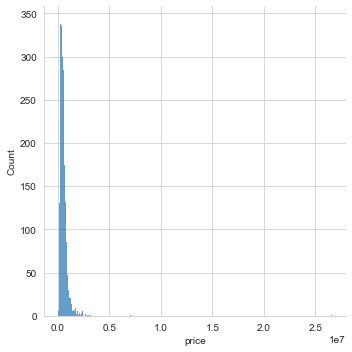

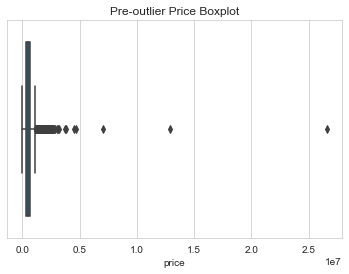

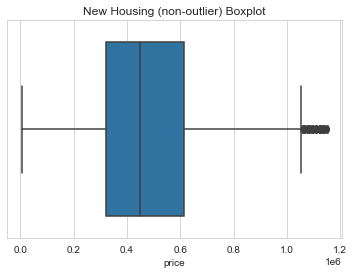

In [15]:
# Dropping country, street, and state zip
housing.drop('country', axis=1, inplace=True)
housing.drop('street', axis=1, inplace=True)
housing.drop('statezip', axis=1, inplace=True)

# Number of houses with a price of zero
len(housing[(housing.price == 0)])
# Dropping these rows
housing = housing.drop(housing[housing.price == 0].index)
housing = housing.drop(housing[housing.bedrooms == 0].index)
# Dropping bedroom outliers
housing = housing.drop(housing[housing.bedrooms == 8].index)
housing = housing.drop(housing[housing.bedrooms == 9].index)
# Checking result
housing.shape
# Resetting indexes after the rows are dropped
housing = housing.reset_index()
housing.head()

## Checking for outliers in independent variable (price)
# Plotting price
x = housing.price
plt.figure()
sns.set_style('whitegrid')
sns.displot(x)
plt.show

# Plotting boxplot
plt.figure()
sns.boxplot(x='price', data=housing).set_title('Pre-outlier Price Boxplot')

# Remove outliers function
def remove_outliers(df, x):
    """
        Function used to remove outliers in dataframe df for variable x
    Args:
        df - input dataframe
        x - variable in df whose outliers are to be calculated
    Returns:
        data frame with outlier points removed
        df
    """
    # Set Limits
    q25, q75 = np.percentile(df[x], 25), np.percentile(df[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1 ,  (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed\n'.format(x))
    return df

# Removing outliers from housing dataframe
housing = remove_outliers(housing, 'price')

# Checking new housing shape
print("Non Outlier Housing Shape:\n", housing.shape)

# Plotting boxplot
plt.figure()
sns.boxplot(x='price', data=housing).set_title('New Housing (non-outlier) Boxplot')

# Adding year column
housing['year'] = housing.date.dt.year
# Checking for unique years
housing.year.value_counts()
print('Years\n',housing.year.value_counts())

# Adding month column
housing['month'] = housing.date.dt.month
# Checking for unique months
print('Months\n',housing.month.value_counts())

# Dropping the year variable since all data is from 1 year 
housing.drop(['date','year'], axis=1, inplace=True)

The distribution of sale prices is right skewed. This is something that is to be expected. In any neighborhood, it is normal to see a few houses that are relatively more expensive. From the boxplot, it can be seen that there are some outliers in the price variable. These outliers have been removed because they would've greatly affected the machine learning model. Next, I checked to see if this data was collected over several years. All of the data was collected in 2014. Next, I added a month variable. There are house listings from May, June and July. Finally, I removed the date and year variables from the dataframe since they were redundant. 

## Exploratory Data Analysis and Descriptive Statistics

#### Shape of Data

In [16]:
# Shape of Data
housing.shape

(4308, 16)

#### Basic statistics for all the variables

In [17]:
# Basic statistics for all columns
np.round(housing.describe(), 2)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month
count,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00,4308.00
mean,2273.47,487323.98,3.35,2.09,2029.86,14604.48,1.49,0.00,0.17,3.44,1746.60,283.26,1970.88,809.75,5.76
std,1316.91,215517.45,0.87,0.71,809.72,36153.00,0.54,0.06,0.64,0.67,763.46,422.03,29.51,979.68,0.68
min,0.00,7800.00,1.00,0.75,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00,5.00
25%,1133.75,320000.00,3.00,1.75,1430.00,5000.00,1.00,0.00,0.00,3.00,1170.00,0.00,1951.00,0.00,5.00
50%,2266.50,450000.00,3.00,2.25,1920.00,7567.00,1.50,0.00,0.00,3.00,1540.00,0.00,1976.00,0.00,6.00
75%,3407.25,615000.00,4.00,2.50,2510.00,10701.00,2.00,0.00,0.00,4.00,2190.00,560.00,1996.00,1999.00,6.00
max,4599.00,1150000.00,7.00,5.75,7320.00,1074218.00,3.50,1.00,4.00,5.00,7320.00,2300.00,2014.00,2014.00,7.00


In [18]:
# Checking for duplicate values
duplicate = housing.duplicated()
print(duplicate.sum())

0


#### Correlation Analysis

<AxesSubplot:>

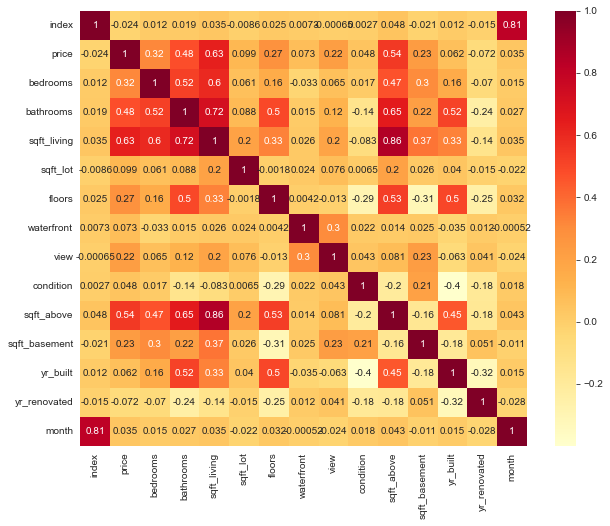

In [19]:
# Heatmap of correlation between different variables
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
cor = housing.corr()
sns.heatmap(cor, annot=True, cmap = 'YlOrRd')

Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. From the correlation heatmap, we can see that there are not a lot of the variables are strongly correlated to our independent variable which is price. We can see that bathrooms, square foot living and square foot above are positivity related to price and this relationship has a moderate strength. This is what one might expect because these features are related to space and it makes sense for larger properties to be pricier. Square foot living and square foot above are also highly correlated. They have a pearson correlation of 0.86. Square foot living is the more informative variable of the two as its correlation with price is higher. To avoid multicollinearity, I will drop the square foot above variable from our dataframe. 

Distinct house age years 
 2006    102
2005     97
2007     87
1978     85
2004     83
       ... 
1913      5
1935      5
1933      5
1934      3
1936      2
Name: yr_built, Length: 115, dtype: int64
Distinct house renovation years 
 0       2559
2000     163
2003     133
2001     102
2009     101
2005      89
2004      75
2014      68
2006      64
2013      59
2011      54
1994      54
1989      52
1923      51
2012      45
2008      44
1988      41
1983      39
1999      37
2002      36
1993      36
1998      36
1912      32
1979      30
1992      30
2010      28
1997      28
1985      27
1982      22
1996      20
1972      17
1956      14
1990      13
1963      12
1969      10
1968       9
1984       9
1970       9
1954       8
2007       6
1974       6
1934       6
1971       5
1958       5
1986       4
1945       4
1978       3
1980       2
1955       2
1987       1
1966       1
1960       1
1953       1
1981       1
1948       1
1995       1
1913       1
1977       1
Name: yr_re

Text(0.5, 1.0, 'Year Renovated Histogram')

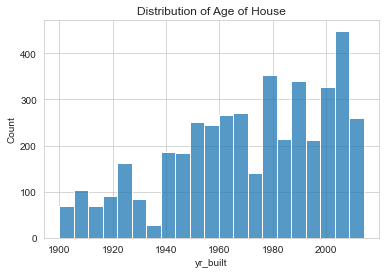

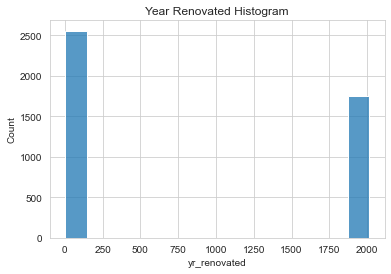

In [20]:
# dropping square foot above from the dataframe
housing.drop('sqft_above', axis=1, inplace=True)

# Histogram of the year houses were built
print('Distinct house age years \n',housing.yr_built.value_counts())
plt.figure()
sns.histplot(x='yr_built', data=housing).set_title("Distribution of Age of House")

# Year renovated variable
print('Distinct house renovation years \n',housing.yr_renovated.value_counts())
plt.figure()
sns.histplot(x='yr_renovated', data=housing).set_title("Year Renovated Histogram")

In [21]:
# If a house was ever renovated it is given a value of 1 for this variable. If it was never 
# renovated then it is given a value of 0.
housing.yr_renovated = housing.yr_renovated.apply(lambda x: x if x == 0 else 1)
housing.yr_renovated.value_counts()

housing.head(30)


,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,city,month
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,1,Shoreline,5
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,0,Kent,5
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,Bellevue,5
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1,Redmond,5
5,5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,0,1938,1,Seattle,5
6,6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,0,1976,0,Redmond,5
7,7,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,0,1989,0,Maple Valley,5
8,8,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,860,1985,0,North Bend,5
9,9,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,0,1945,1,Seattle,5
10,10,463000.0,3.0,1.75,1710,7320,1.0,0,0,3,0,1948,1,Lake Forest Park,5


From the distribution of the year the house was built, we can see that the range is quite large. The range is around 115 years. The age of the house should have some impact on the price of the house. This is not the only variable to keep in mind though. Some houses have been renovated during their life cycle and some have not. Approximately 2559 houses have never been renovated and the rest have been renovated atleast once during their life span so far. If a house has ever been renovated, I gave it a value of 1 for the renovation variable otherwise it is given a value of 0. 

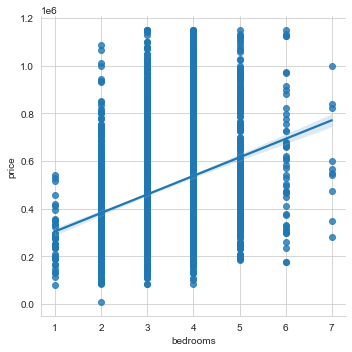

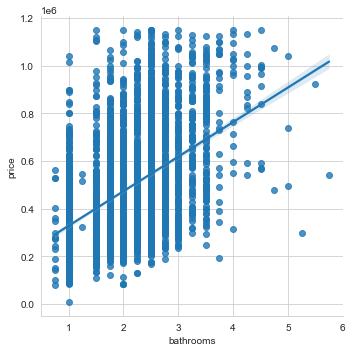

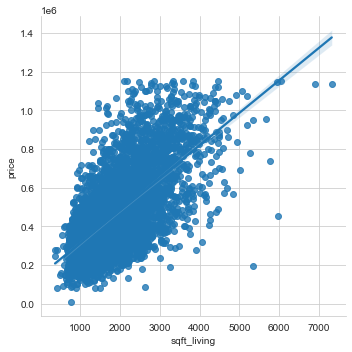

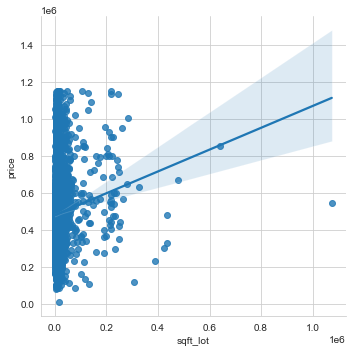

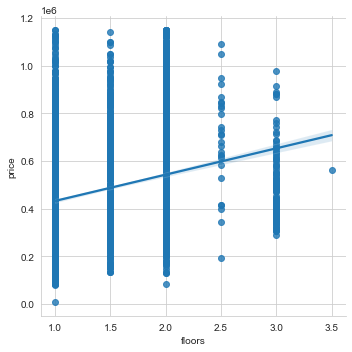

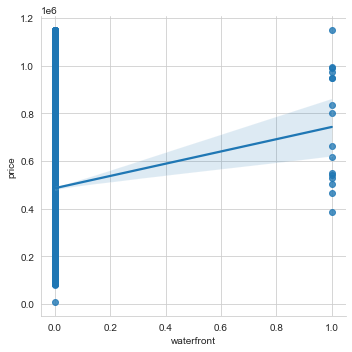

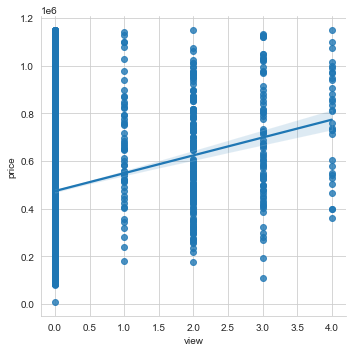

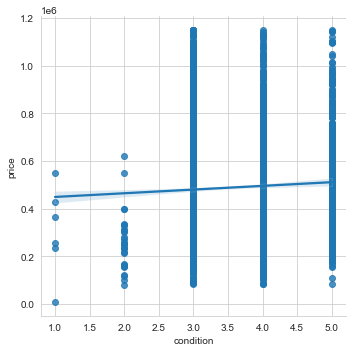

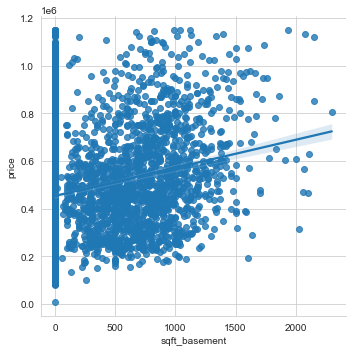

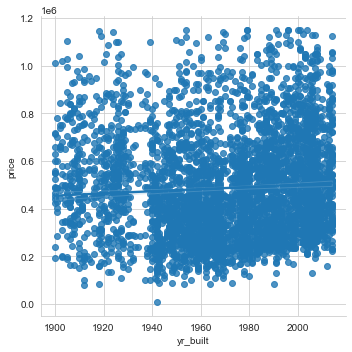

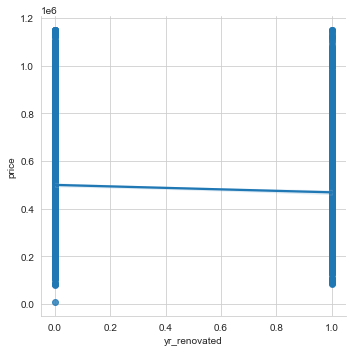

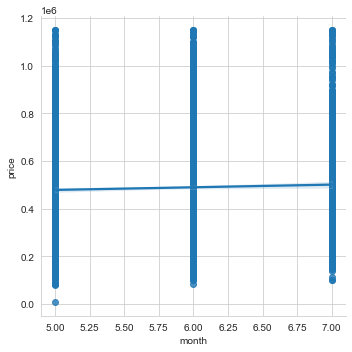

In [22]:
# Visualizing Regression plots of all remaining variables and the price of the house
columns = []
for i in housing.columns:
    columns.append(i)

# Removing categorical column city
columns.remove('price')
columns.remove('city')
columns.remove('index')
for col in columns:
    sns.lmplot(x =col, y ='price', data=housing)

From the plots above, it can be seen that several numeric variables have a generally positive linear relationship with price. These include bedrooms, waterfront, view, sqft_living, condition, and bathrooms. 

## Feature Engineering

Machine learning models don't understand categorical data. I will have to make some sort of transformation to convert categories into numbers. I will achieve this by using one-hot-encoding. I will use scikit-learn's OneHotEncoder. I will encode the city variable. 

In [24]:
housing= pd.get_dummies(housing, drop_first=True)
housing.head().T


# # performing label encoder
# lab_enc = preprocessing.LabelEncoder()
# housing['city_encoded'] = lab_enc.fit_transform(housing.city)

# # confirming label encoding
# housing.city_encoded.value_counts()

# # dropping the city variable
# housing.drop('city', axis=1, inplace=True)

# # one-hot-encoding
# one_hot_encode = OneHotEncoder(sparse=False)
# one_hot_encode_df = pd.DataFrame(one_hot_encode.fit_transform(housing[['city_encoded']]).toarray())

# import sys
# np.set_printoptions(threshold=sys.maxsize)


# # merging one_hot_encode_df to the main housing dataframe
# housing = housing.join(one_hot_encode_df)
# housing.head()

# # dropping city_encoded variable
# housing.drop('city_encoded', axis=1, inplace=True)




,0,2,3,4,5
index,0.0,2.0,3.00,4.0,5.0
price,313000.0,342000.0,420000.00,550000.0,490000.0
bedrooms,3.0,3.0,3.00,4.0,2.0
bathrooms,1.5,2.0,2.25,2.5,1.0
sqft_living,1340.0,1930.0,2000.00,1940.0,880.0
sqft_lot,7912.0,11947.0,8030.00,10500.0,6380.0
floors,1.5,1.0,1.00,1.0,1.0
waterfront,0.0,0.0,0.00,0.0,0.0
view,0.0,0.0,0.00,0.0,0.0
condition,3.0,4.0,4.00,4.0,3.0


## Machine Learning

In [25]:
# Features
X = housing.drop(['price','index'], axis = 1)
# Target
y = pd.DataFrame(housing.price.values)
# splitting the data into X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

# checking shapes of newly created dataframes
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Shape of X_train: (3231, 13)
Shape of X_test: (1077, 13)
Shape of y_train: (3231, 1)
Shape of y_test: (1077, 1)


#### Linear Regression
I will use a linear regression model as my base model. 

In [26]:
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# # print(np.argwhere(np.isnan(np.array(X_train))))
# np.isnan(np.array(X_train))


from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# fitting training data to linear regression model
lr.fit(X_train, y_train)
# making predictions
y_pred = lr.predict(X_test)
# calculating training accuracy
print('Linear Regression training accuracy:\n',lr.score(X_train, y_train))
# calculating testing accuracy
print('Linear Regression testing accuracy:\n',lr.score(X_test, y_test))

Linear Regression training accuracy:
 0.4977628243922536
Linear Regression testing accuracy:
 0.45942962395787035


#### Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
lasso= Lasso(max_iter=10000)
lasso.fit(X_train, y_train)
# calculating training accuracy
print('Lasso Regression training accuracy:\n',lasso.score(X_train, y_train))
# calculating testing accuracy
print('Lasso Regression testing accuracy:\n',lasso.score(X_test, y_test))

Lasso Regression training accuracy:
 0.4977628239706775
Lasso Regression testing accuracy:
 0.45943017177758816


#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train, y_train)
# calculating training accuracy
print('Random Forest training accuracy:\n',rf_reg.score(X_train, y_train))
# calculating testing accuracy
print('Random Forest testing accuracy:\n',rf_reg.score(X_test, y_test))

/var/folders/13/619wv1c97rgffqwsk2ctlh7h0000gn/T/ipykernel_43972/1769149856.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Random Forest training accuracy:
 0.9497013649117625
Random Forest testing accuracy:
 0.6453433066817396


#### Xgboost

In [29]:
# import xgboost
# from xgboost import XGBRegressor
# xgb_reg = XGBRegressor()
# xgb_reg.fit(X_train, y_train)
# # calculating training accuracy
# print('Xgboost training accuracy:\n',xgb_reg.score(X_train, y_train))
# # calculating testing accuracy
# print('Xgboost testing accuracy:\n',xgb_reg.score(X_test, y_test))

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/ritiksharma/opt/anaconda3/envs/csc311/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/ritiksharma/opt/anaconda3/envs/csc311/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]
